In [1]:
# Importing the required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

In [2]:
df=pd.read_csv("AEP_hourly.csv")


In [3]:
df.head(7)

,Datetime,AEP_MW,Date
0,2004-12-31 01:00:00,13478.0,31-12-2004 1.00
1,2004-12-31 02:00:00,12865.0,31-12-2004 2.00
2,2004-12-31 03:00:00,12577.0,31-12-2004 3.00
3,2004-12-31 04:00:00,12517.0,31-12-2004 4.00
4,2004-12-31 05:00:00,12670.0,31-12-2004 5.00
5,2004-12-31 06:00:00,13038.0,31-12-2004 6.00
6,2004-12-31 07:00:00,13692.0,31-12-2004 7.00


In [4]:
# Information about Dataset:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
 2   Date      121273 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.8+ MB
None


In [5]:
# Describing the dataset:
print(df.describe())

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000


# Data Preprocessing:

In [6]:
df.loc[~df.index.duplicated(), :]      # Removing duplicates from the dataset.

,Datetime,AEP_MW,Date
0,2004-12-31 01:00:00,13478.0,31-12-2004 1.00
1,2004-12-31 02:00:00,12865.0,31-12-2004 2.00
2,2004-12-31 03:00:00,12577.0,31-12-2004 3.00
3,2004-12-31 04:00:00,12517.0,31-12-2004 4.00
4,2004-12-31 05:00:00,12670.0,31-12-2004 5.00
...,...,...,...
121268,2018-01-01 20:00:00,21089.0,01-01-2018 20.00
121269,2018-01-01 21:00:00,20999.0,01-01-2018 21.00
121270,2018-01-01 22:00:00,20820.0,01-01-2018 22.00
121271,2018-01-01 23:00:00,20415.0,01-01-2018 23.00


In [7]:
# Couting null values:
df.isnull().sum()

Datetime    0
AEP_MW      0
Date        0
dtype: int64

In [8]:
df1=df
df1["Month"]=pd.to_datetime(df["Datetime"]).dt.month
df1["Year"]=pd.to_datetime(df["Datetime"]).dt.year
df1["Date"]=pd.to_datetime(df["Datetime"]).dt.date
df1["Time"]=pd.to_datetime(df["Datetime"]).dt.time
df1["Week"]=pd.to_datetime(df["Datetime"]).dt.week
df1["Day"]=pd.to_datetime(df["Datetime"]).dt.day_name()
df1=df.set_index("Datetime")
df1.index=pd.to_datetime(df1.index)
df1.head()

C:\Users\shyam\AppData\Local\Temp\ipykernel_4640\4093023260.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1["Week"]=pd.to_datetime(df["Datetime"]).dt.week


,AEP_MW,Date,Month,Year,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,2004-12-31,12,2004,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,2004-12-31,12,2004,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,2004-12-31,12,2004,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,2004-12-31,12,2004,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,2004-12-31,12,2004,05:00:00,53,Friday


In [9]:
#No.of Unique Years:
print(df.Year.unique(),"\n")
print("Unique Years : ", df.Year.nunique())

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Unique Years :  15


## Energy Consumption Each Year

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Energy Consumption According to Year')

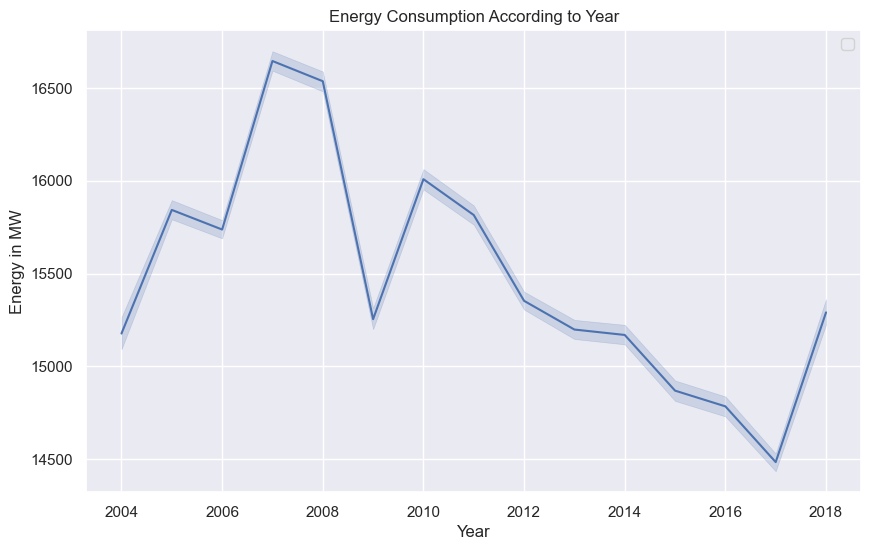

In [78]:
from matplotlib import style

fig=plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))
style.use("ggplot")

sns.lineplot(x="Year", y="AEP_MW", data=df)
sns.set(rc={"figure.figsize":(10,6)})

plt.xlabel("Year")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(0)
    
plt.title("Energy Consumption According to Year")

C:\Users\shyam\AppData\Local\Temp\ipykernel_4640\441839298.py:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2004 = df1["2004"]["AEP_MW"].to_list()
C:\Users\shyam\AppData\Local\Temp\ipykernel_4640\441839298.py:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_2004 = df1["2004"]["Date"].to_list()
C:\Users\shyam\AppData\Local\Temp\ipykernel_4640\441839298.py:18: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2005 = df1["2005"]["AEP_MW"].to_list()
C:\Users\shyam\AppData\Local\Temp\ip

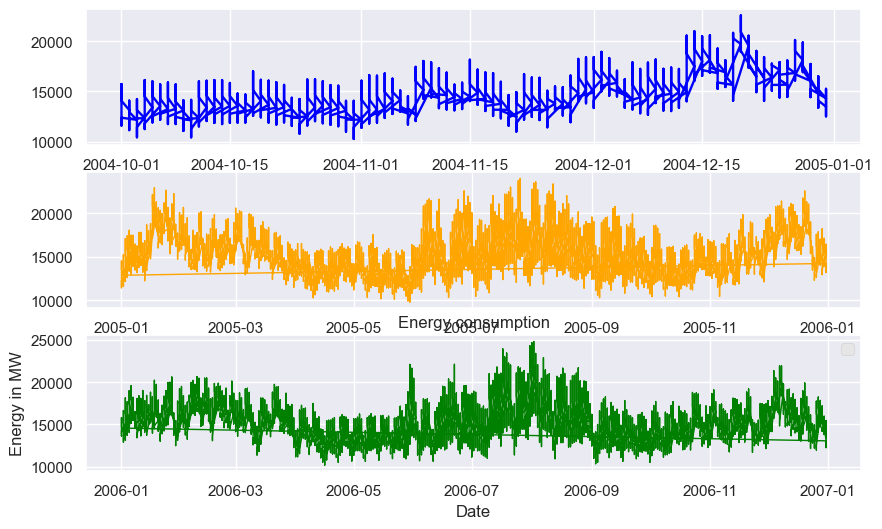

In [11]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)

plt.title("Energy consumption")
style.use('ggplot')

y_2004 = df1["2004"]["AEP_MW"].to_list()
x_2004 = df1["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="blue", linewidth=1.7)


y_2005 = df1["2005"]["AEP_MW"].to_list()
x_2005 = df1["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="orange", linewidth=1)


y_2006 = df1["2006"]["AEP_MW"].to_list()
x_2006 = df1["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)

plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()
# plt.title("Energy consumption")

## Energy Distribution:

C:\Users\shyam\AppData\Local\Temp\ipykernel_4640\1284610990.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["AEP_MW"],color = 'b')


Text(0.5, 1.0, 'Energy Distribution')

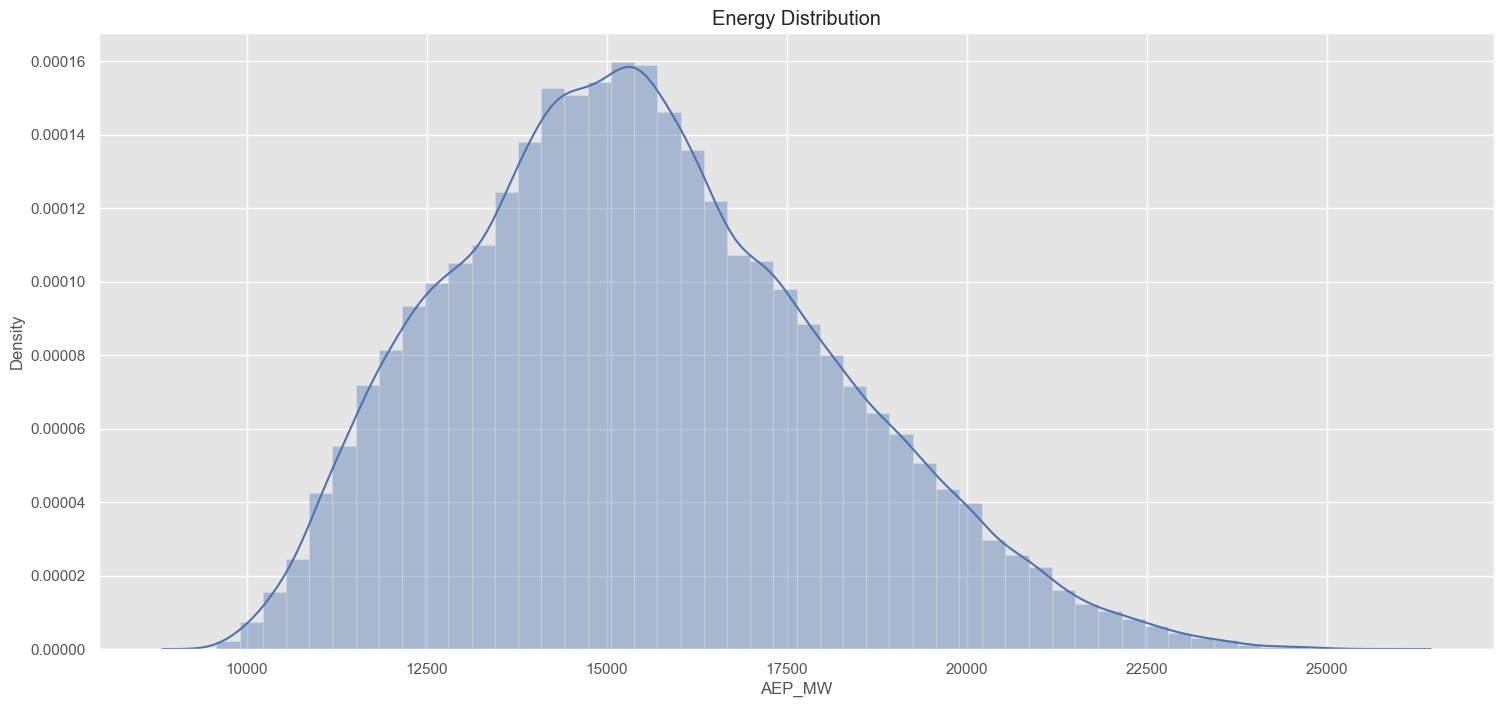

In [12]:
sns.distplot(df1["AEP_MW"],color = 'b')
plt.title("Energy Distribution")


## Energy with respect to Time:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


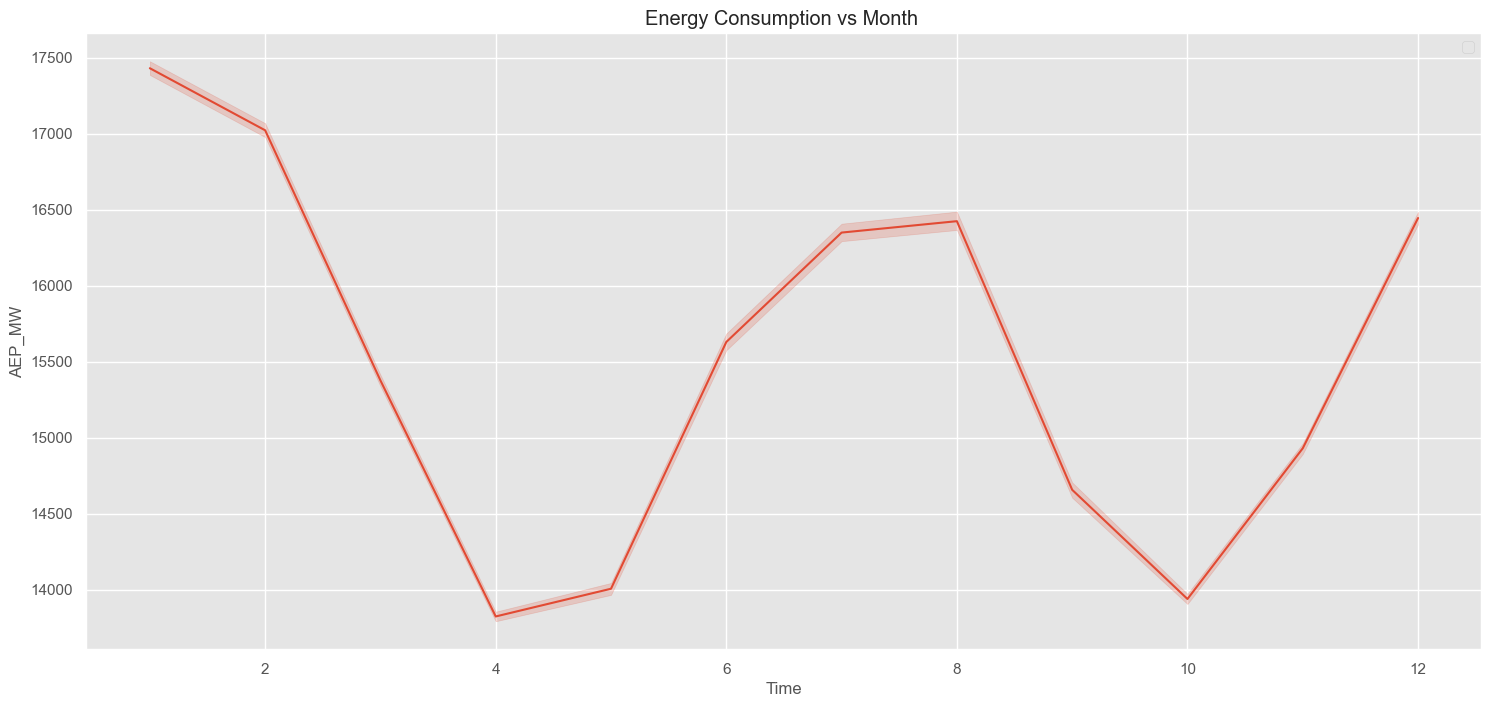

In [13]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=df["Month"],y=df["AEP_MW"], data=df)
plt.title("Energy Consumption vs Month ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()


## Resampling the data:

In [14]:
NewDataset = df1.resample('D').mean()


C:\Users\shyam\AppData\Local\Temp\ipykernel_4640\3674135585.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NewDataset = df1.resample('D').mean()


In [15]:
print("old dataset",df1.shape)
print("new dataset",NewDataset.shape)

old dataset (121273, 7)
new dataset (5055, 4)


In [16]:
NewDataset

,AEP_MW,Month,Year,Week
Datetime,,,,
2004-10-01,14284.521739,10.0,2004.0,40.0
2004-10-02,12999.875000,10.0,2004.0,40.0
2004-10-03,12227.083333,10.0,2004.0,40.0
2004-10-04,14309.041667,10.0,2004.0,41.0
2004-10-05,14439.708333,10.0,2004.0,41.0
...,...,...,...,...
2018-07-30,15368.083333,7.0,2018.0,31.0
2018-07-31,15180.291667,7.0,2018.0,31.0
2018-08-01,15151.166667,8.0,2018.0,31.0


In [17]:
TestData = NewDataset.tail(100)
TestData

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0
2018-04-28,12237.583333,4.0,2018.0,17.0
2018-04-29,12156.791667,4.0,2018.0,17.0
2018-04-30,13443.500000,4.0,2018.0,18.0
...,...,...,...,...
2018-07-30,15368.083333,7.0,2018.0,31.0
2018-07-31,15180.291667,7.0,2018.0,31.0
2018-08-01,15151.166667,8.0,2018.0,31.0


In [18]:
#Training the Dataset:
Training_Set = NewDataset.iloc[:,0:1]
Training_Set = Training_Set[:-60]
Training_Set

,AEP_MW
Datetime,
2004-10-01,14284.521739
2004-10-02,12999.875000
2004-10-03,12227.083333
2004-10-04,14309.041667
2004-10-05,14439.708333
...,...
2018-05-31,16741.083333
2018-06-01,15734.666667
2018-06-02,14212.166667


In [19]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [20]:
from sklearn.preprocessing import MinMaxScaler
#Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range = (0,1))
Train = sc.fit_transform(Training_Set)
Train

array([[0.27243207],
       [0.16328467],
       [0.09762599],
       ...,
       [0.26628457],
       [0.23335788],
       [0.25909104]])

In [21]:
X_Train = []
Y_Train = []

# Range should be from 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [22]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape
     

(4935, 60, 1)

## Model:

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

# Assuming X_Train is your input data
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')


In [24]:
regressor.fit(X_Train, Y_Train, epochs = 20, batch_size = 32)

Epoch 1/20

155/155 [==============================] - 22s 77ms/step - loss: 0.0232
Epoch 2/20
155/155 [==============================] - 12s 75ms/step - loss: 0.0194
Epoch 3/20
155/155 [==============================] - 12s 78ms/step - loss: 0.0175
Epoch 4/20
155/155 [==============================] - 12s 75ms/step - loss: 0.0165
Epoch 5/20
155/155 [==============================] - 12s 76ms/step - loss: 0.0162
Epoch 6/20
155/155 [==============================] - 12s 77ms/step - loss: 0.0160
Epoch 7/20
155/155 [==============================] - 12s 77ms/step - loss: 0.0150
Epoch 8/20
155/155 [==============================] - 12s 76ms/step - loss: 0.0146
Epoch 9/20
155/155 [==============================] - 12s 76ms/step - loss: 0.0126
Epoch 10/20
155/155 [==============================] - 12s 76ms/step - loss: 0.0110
Epoch 11/20
155/155 [==============================] - 12s 75ms/step - loss: 0.0098
Epoch 12/20
155/155 [==============================] - 11s 71ms/step - loss: 0.0092


# Test Data

In [25]:
TestData.head()

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0
2018-04-28,12237.583333,4.0,2018.0,17.0
2018-04-29,12156.791667,4.0,2018.0,17.0
2018-04-30,13443.500000,4.0,2018.0,18.0


In [26]:
TestData.shape
     

(100, 4)

In [27]:
NewDataset.shape

(5055, 4)

In [28]:
Df_Total = pd.concat((NewDataset[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)
     

In [29]:
Df_Total.shape

(5155, 1)

In [30]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [31]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
     

C:\Users\shyam\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4/4 [==============================] - 2s 20ms/step


In [32]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()
     


In [33]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

## Future Predicted

In [34]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,14345.389648
1,2018-04-27,12964.000000,13779.900391
2,2018-04-28,12237.583333,14429.224609
3,2018-04-29,12156.791667,13628.257812
4,2018-04-30,13443.500000,13448.876953
...,...,...,...
95,2018-07-30,15368.083333,15005.142578
96,2018-07-31,15180.291667,16067.600586
97,2018-08-01,15151.166667,15405.083008
98,2018-08-02,15687.666667,15259.786133


In [35]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

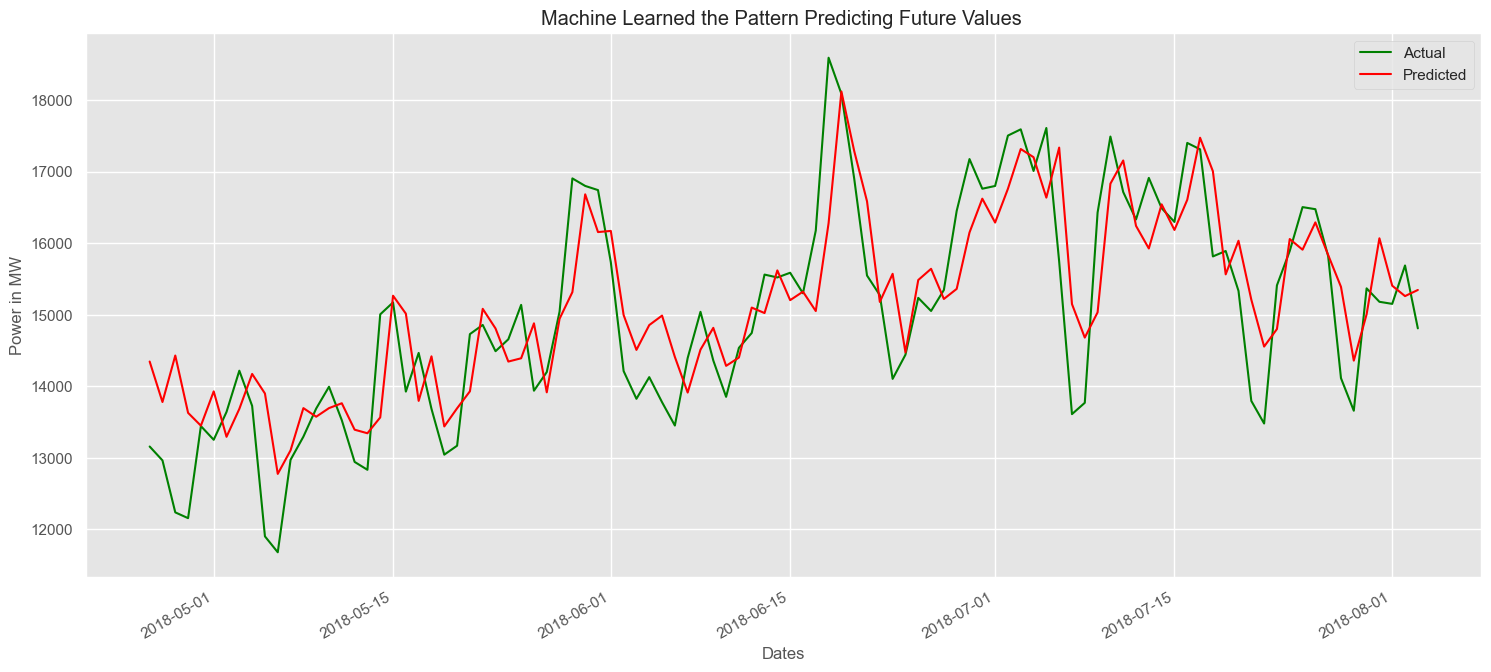

In [39]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green",label="Actual")
plt.plot(x,y1, color="red",label="Predicted")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()